# Introduction to Deep Learning - Lab 2


### Objective:

In this second lab, we will look in more detail at how the architecture and hyperparameters of a network can be chosen to improve the results. The first part of the lab will be run on Playground Tensorflow, to visualise the impact of different hyperparameters on the training procedure. We will then move on to the code on Pytorch to see how these hyperparameters can be modified in practice. Finally, the last part, which is more open-ended, will enable you to use a package that I developed during the first year of my PhD that automates the optimisation of these hyperparameters. Please do not spend more than 30 minutes on the Playground Tensorflow part.

### Playground Tensorflow

Playground Tensorflow is an interactive visualization tool developed by Google Brain that enables you to easily parameterise a neural network on small classification tasks and visualise the training.

- Go to https://playground.tensorflow.org/#activation=linear&batchSize=10&dataset=gauss&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=1&seed=0.64880&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false.



- We have here a very simple classification problem.
  - Which activation function are we using and why ?
  - Modify the weights of the two first synapses and the last one. Did you manage to change the loss?
  - Modify the learning rate and see how the convergence speed is modified.

- Change the dataset on the left, and pick the Circle one (the first one). Add 3 neurons to your hidden layer.
  - Train the Neural Network with various activation functions. For each activation function comment the performance and the resulting decision function.

- Change the dataset to the exclusive or (XOR) dataset. Set the learning rate to 0.001 and set the activation function to tanh.
  - Train the model for 100 epochs (001,000). What is the resulting score ?
  - Initialize the model by setting all the weights to 0. What is the score after 800 epochs ? Comment the learning curve.
  - Try to find better initialization weights for your model. Can you improve the loss after 800 epochs?

- Go back to the Circle dataset. Set the learning rate to 0.01. Create a Neural Network with 2 hidden layers whith respectively 4 and 2 neurons, with the activation function ReLU. Set the variable noise to 20.
  - Run the model for 1000 epochs. What is happening ? How is this phenomena called?
  - Find a way without modifying the model to prevent this phenomena to happen. Explain your solution and give your result here.

- Select the Spiral dataset. Try to modify anything you want from the application (input features, regularization, model architecture, ...) and try to reach the best score. Detail here your solution and give your final score.

### Pytorch

## Data Preparation

During this practical work we will use the QuickDraw dataset: https://quickdraw.withgoogle.com/data. This dataset contains thousands of hand-drawn drawings classified into different categories. Google has created a deep learning model capable of recognising these drawings. You can go and test the application. The aim of this tutorial is to recreate a model like Google's able to recognise a small number of drawing categories: sheep, Eiffel Towers, vans, guitars and dragons. Using the Pytorch package, you will have to create the best-performing model possible.

In [2]:
!pip install --quiet quickdraw

In [3]:
from quickdraw import QuickDrawDataGroup

sheeps = QuickDrawDataGroup('sheep', recognized = True, max_drawings=7000)
eiffels = QuickDrawDataGroup('The Eiffel Tower', recognized = True, max_drawings=7000)
vans = QuickDrawDataGroup('van', recognized = True, max_drawings=7000)
guitars = QuickDrawDataGroup('guitar', recognized = True, max_drawings=7000)
dragons = QuickDrawDataGroup('dragon', recognized = True, max_drawings=7000)

downloading sheep from https://storage.googleapis.com/quickdraw_dataset/full/binary/sheep.bin
download complete
loading sheep drawings
load complete
downloading The Eiffel Tower from https://storage.googleapis.com/quickdraw_dataset/full/binary/The Eiffel Tower.bin
download complete
loading The Eiffel Tower drawings
load complete
downloading van from https://storage.googleapis.com/quickdraw_dataset/full/binary/van.bin
download complete
loading van drawings
load complete
downloading guitar from https://storage.googleapis.com/quickdraw_dataset/full/binary/guitar.bin
download complete
loading guitar drawings
load complete
downloading dragon from https://storage.googleapis.com/quickdraw_dataset/full/binary/dragon.bin
download complete
loading dragon drawings
load complete


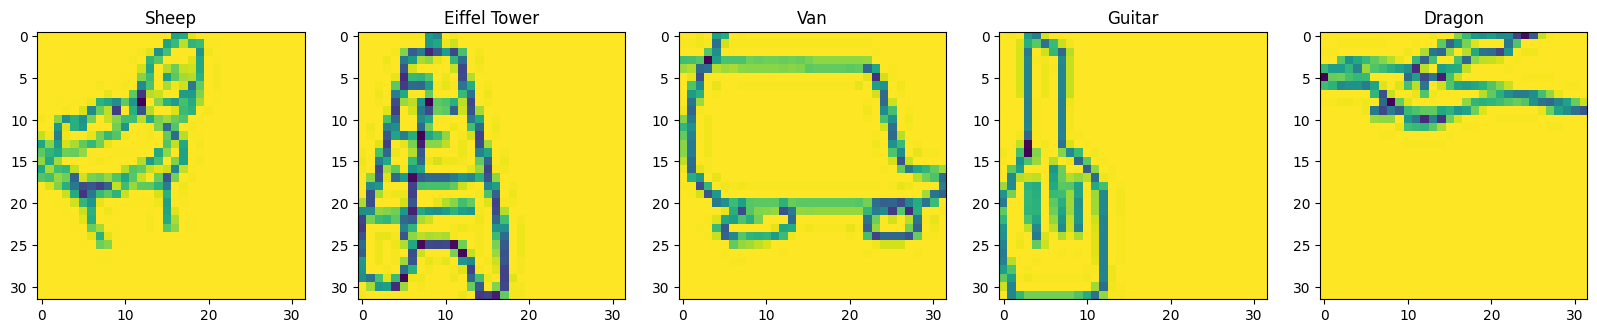

In [4]:
import matplotlib.pyplot as plt
from PIL import Image
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(20, 40))
ax[0].imshow(sheeps.get_drawing().get_image().convert('L').resize((32,32),Image.LANCZOS))
ax[0].set_title('Sheep')
ax[1].imshow(eiffels.get_drawing().get_image().convert('L').resize((32,32),Image.LANCZOS))
ax[1].set_title('Eiffel Tower')
ax[2].imshow(vans.get_drawing().get_image().convert('L').resize((32,32),Image.LANCZOS))
ax[2].set_title('Van')
ax[3].imshow(guitars.get_drawing().get_image().convert('L').resize((32,32),Image.LANCZOS))
ax[3].set_title('Guitar')
ax[4].imshow(dragons.get_drawing().get_image().convert('L').resize((32,32),Image.LANCZOS))
ax[4].set_title('Dragon')
plt.show()

After downloading the data we're interested in (only the sheep, eiffel tower, van, guitar and dragon categories from the entire dataset), we convert the data into 32-by-32 numpy arrays.

In [5]:
import numpy as np

sheeps_drawings = []
for s in sheeps.drawings:
    sheeps_drawings.append(np.array(s.get_image().convert('L').resize((32,32),Image.LANCZOS))/255.)
print(f'We have {len(sheeps_drawings)} images of sheeps.')
eiffels_drawings = []
for s in eiffels.drawings:
    eiffels_drawings.append(np.array(s.get_image().convert('L').resize((32,32),Image.LANCZOS))/255.)
print(f'We have {len(eiffels_drawings)} images of the Eiffel Tower.')
vans_drawings = []
for s in vans.drawings:
    vans_drawings.append(np.array(s.get_image().convert('L').resize((32,32),Image.LANCZOS))/255.)
print(f'We have {len(vans_drawings)} images of vans.')
guitars_drawings = []
for s in guitars.drawings:
    guitars_drawings.append(np.array(s.get_image().convert('L').resize((32,32),Image.LANCZOS))/255.)
print(f'We have {len(guitars_drawings)} images of guitars.')
dragons_drawings = []
for s in dragons.drawings:
    dragons_drawings.append(np.array(s.get_image().convert('L').resize((32,32),Image.LANCZOS))/255.)
print(f'We have {len(dragons_drawings)} images of dragons.')
print(f'An image has a shape of {dragons_drawings[0].shape}')

We have 7000 images of sheeps.
We have 7000 images of the Eiffel Tower.
We have 7000 images of vans.
We have 7000 images of guitars.
We have 7000 images of dragons.
An image has a shape of (32, 32)


In [6]:
from sklearn.model_selection import train_test_split

# We create or X array by concatenating the images from all categories
X = sheeps_drawings + eiffels_drawings + vans_drawings + guitars_drawings + dragons_drawings

# We create the labels:
#  - 0: sheep
#  - 1: Eiffel Tower
#  - 2: Van
#  - 3: Guitar
#  - 4: Dragon
y = [0 for _ in range(len(sheeps_drawings))] + [1 for _ in range(len(eiffels_drawings))] + [2 for _ in range(len(vans_drawings))] + [3 for _ in range(len(guitars_drawings))] + [4 for _ in range(len(dragons_drawings))]


# We randomly split the data into the train and test dataset. We will train our model on the train dataset and validate its performance on the test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print(f'Size training set: {len(X_train)}, size test set: {len(X_test)}')


Size training set: 24500, size test set: 10500


Deep learning models typically require large amounts of data for training. Instead of feeding the model one data point at a time—which would be extremely time-consuming—the data is presented in small groups called batches. For each batch, the model updates its gradients and computes the loss.

The size of the batch has an important impact on training: small batches lead to more frequent gradient updates, which can increase the training time, while large batches can exceed memory capacity, causing errors. It is crucial that the data within each batch is formatted consistently, which can be challenging depending on the dataset.

To simplify this process, it is recommended to use PyTorch’s built-in ```Dataset``` and ```DataLoader``` classes. These classes help organize and efficiently load data in batches, ensuring that the model receives it in the correct format. More details and tutorials can be found (https://pytorch.org/tutorials/beginner/basics/data_tutorial.html).

In [7]:
import torch
from torch.utils.data import Dataset

class DrawingsDataset(Dataset):
  def __init__(self, X, y):
    # The init class is used to define your dataset attributes.
    # X contains our images, we convert them to float PyTorch tensor
    self.X = torch.FloatTensor(X)
    # The labels are integeres (classes from 0 to 4), we convert them to long (integer) PyTorch tensors.
    self.y = torch.LongTensor(y)

  def __len__(self):
    ### TODO: compute the length of your full dataset
    # Updating this function is mandatory when you are using a PyTorch dataset
    ###
    return len(self.X)

  def __getitem__(self, idx):
    ### TODO: implement this function, so that it returns the data and the label at the index 'idx'
    # Input: idx
    # Output: (x_idx, y_idx)
    # Updating this function is mandatory when you are using a PyTorch dataset
    ###
    return self.X[idx], self.y[idx]

During this lab we will only use MLP layers (```torch.nn.Linear```). Our input data is for now in two-dimensions. We will reshape it to an 1D-array of shape $32 \times 32 = 1024$. This means your input data will have **1024** features.

In [8]:
X_train = np.asarray(X_train).reshape(len(X_train),-1)
X_test = np.asarray(X_test).reshape(len(X_test),-1)

print(f"Data 1D-shape: {X_train[0].shape}")

Data 1D-shape: (1024,)


Now that our data is ready, we define our train and test datasets using the ```DrawingDataset``` that we just implemented.

In [9]:
### TODO: create the train and test datasets using the DrawingsDataset class.

train_dataset = DrawingsDataset(X_train, y_train)
test_dataset = DrawingsDataset(X_test, y_test)

With our dataset we can use the ```DataLoader``` from PyTorch. This class takes as input a PyTorch ```Dataset``` (like our ```DrawingDataset```) and the batch size. It will automatically create batches by calling the function ```__getitem__``` of your dataset.

In [10]:
from torch.utils.data import DataLoader

batch_size = 200
train_dataloader = DataLoader(dataset=train_dataset, batch_size=batch_size)
test_dataloader = DataLoader(dataset=test_dataset, batch_size=batch_size)

### Defining the neural network

Like in the first tutorial, we're going to create a neural network with two hidden layers using PyTorch's ``nn.torch.Linear`` layers. The first will allow us to go from the input shape (number of features) to our hidden shape. The second is used to convert from the hidden shape to the output format. Do not forget the activation functions! I recommand ```nn.ReLU()``` for the first hidden layer.

In [11]:
import torch.nn as nn
import torch.nn.functional as F


### TODO: create a Neural Network just like the first
class BaseNeuralNetwork(nn.Module):
    def __init__(self, activation):
        super(BaseNeuralNetwork, self).__init__()
        self.hidden_shape = 100
        self.activation = nn.ReLU()
        self.l1 = nn.Linear(1024, self.hidden_shape)
        self.l2 = nn.Linear(self.hidden_shape, output_shape)
    def forward(self, x):
        return self.l2(self.activation(self.l1(x)))
###

### Train and test functions

In [15]:
import torch
from tqdm import tqdm

# We first train our model on the train dataset.
# Use the fonctions provided by PyTorch like in the first tutorial to implement the training loop.
def train_loop(dataloader, model, loss_fn, optimizer, epoch, verbose=True):
    model.train()
    ep_loss = 0
    size = len(dataloader)
    for X,y in dataloader:

      ### TODO: implemente the training loop
      # Gradients to zero
      optimizer.zero_grad()
      # Compute prediction and loss
      y_pred = model(X)
      loss = loss_fn(y_pred, y)
      ep_loss += loss.item() # this is just for the prints below
      # Update gradients
      loss.backward()
      # Update model's weights
      optimizer.step()
      ###
    if verbose:
      print(f'Epoch {epoch}, loss = {ep_loss/size}')
    return model

# Once your model has been train[ed], you have to evaluate it on the test set.
def test_loop(dataloader, model, loss_fn):
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
      for X, y in dataloader:

          pred = model(X)
          loss = loss_fn(pred, y).item()
          test_loss += loss
          ### TODO: compute the model final prediction and the number of correct predictions.
          # Your current output is the probability for each class to be the right one.
          prediction = torch.argmax(pred, dim = 1)
          # To compute the accuracy score, we need to know how many correct predictions we got.
          correct += (prediction == y).sum()
          ###

    avg_loss = test_loss / len(dataloader)
    avg_accuracy = correct / len(dataloader.dataset)
    print(f"Test Error: Accuracy: {(100*avg_accuracy):>0.1f}%, Avg loss: {avg_loss:>8f} \n")
    return test_loss

### Learning

In [31]:
### TODO: instantiate the model
input_shape = 1024
hidden_shape = 100
output_shape = 5
model = BaseNeuralNetwork(nn.ReLU()).float()
###

# Hyperparameters
learning_rate = 0.05
epochs = 20

### TODO: select the right loss function to train your model.
loss_fn = nn.loss_fn = nn.CrossEntropyLoss()
###

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [32]:
# Training
# We apply the training loop for each epoch
for t in range(epochs):
    train_loop(train_dataloader, model, loss_fn, optimizer, t)
test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 0, loss = 1.6009550724572283
Epoch 1, loss = 1.5764107500634543
Epoch 2, loss = 1.5665468849786899
Epoch 3, loss = 1.5602610111236572
Epoch 4, loss = 1.5477978834291783
Epoch 5, loss = 1.5359514282970894
Epoch 6, loss = 1.5187417317212113
Epoch 7, loss = 1.5380525627756507
Epoch 8, loss = 1.5012190119037783
Epoch 9, loss = 1.4936920229981585
Epoch 10, loss = 1.472388560209817
Epoch 11, loss = 1.4639996232056036
Epoch 12, loss = 1.455404303907379
Epoch 13, loss = 1.4373020311681235
Epoch 14, loss = 1.410259993095708
Epoch 15, loss = 1.4033199732865744
Epoch 16, loss = 1.3948893004316625
Epoch 17, loss = 1.3572258765135354
Epoch 18, loss = 1.392642289642396
Epoch 19, loss = 1.338665502827342
Test Error: Accuracy: 43.8%, Avg loss: 1.192966 

Done!


# Regularisation in Pytorch

You probably tried it out at the beginning of the tutorial with PlayGround Tensorflow: regularisation improves model performance, in particular by avoiding overfitting. There are a number of ways of doing regularisation in practice, which we'll look at here.

#### Try adding dropout layers

The first technique is to use Dropout Layers. They randomly zero some of the elements of the input tensor following a Bernouilly law of parameter $p$. In Pytorch it is implemented by ```torch.nn.Dropout``` (https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html).

In [24]:
class DropoutNeuralNetwork(nn.Module):
    ### TODO: modify the base architecture to add a Dropout Layer after your first hidden layer.
    def __init__(self, activation):
        super(DropoutNeuralNetwork, self).__init__()
        self.hidden_shape = 204
        self.activation = nn.ReLU()
        self.dropout = nn.Dropout(p=0.1)
        self.l1 = nn.Linear(1024, self.hidden_shape)
        self.l2 = nn.Linear(self.hidden_shape, 1)
    def forward(self, x):
        return self.l2(self.dropout(self.activation(self.l1(x))))

In [25]:
### TODO: create the model
input_shape = 1024
hidden_shape = 100
output_shape = 1
p = 0.1
model = DropoutNeuralNetwork(nn.ReLU()).float()
###

# Hyperparameters
learning_rate = 0.05
batch_size = 200
epochs = 20
loss_fn = nn.HingeEmbeddingLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [26]:
### Training
for t in range(epochs):
  print("Done!")

Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!


# Initialisation in Pytorch

When you create a model with Pytorch, the weights are initialized randomly. This is why, if you don't set the seed, creating and training the same model several times will give different results. In PyTorch there are ways of influencing the creation of these weights. One technique is to completely choose these weights, for example by setting them all to zero. Another, which is frequently used because it is very effective, is to use Xavier's method. You will be able to compare these two initialisations in this section.

In [27]:
def xavier_weights(model):
  for n, p in model.named_parameters():
    if p.dim() > 1:
      nn.init.xavier_uniform_(p)

def zero_weights(model):
  for n, p in model.named_parameters():
    nn.init.zeros_(p)

In [29]:
### TODO: Create the model and use the xavier_weights initialization
input_shape = 1024
hidden_shape = 100
output_shape = 1
p = 0.1
model = DropoutNeuralNetwork(nn.ReLU()).float()
xavier_weights(model)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
###

### Training
for t in range(epochs):
  print("Done!")

Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!


In [30]:
### TODO: Create the model and use the zero_weights initialization
input_shape = 1024
hidden_shape = 100
output_shape = 1
p = 0.1
model = DropoutNeuralNetwork(nn.ReLU()).float()
zero_weights(model)
optimize = torch.optim.SGD(model.parameters(), lr=learning_rate)
###

### Training
for t in range(epochs):
  print("Done!")

Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!


# Hyperparameters optimization: exercise at home

Find the best DNN by modifying:
- the number of layers
- the layer types (dropout / Linear)
- the number of neurons by layers
- the activation functions
- the optimizer
- the learning rate
- the weights initialization

In [ ]:
### TODO
class BestModel(nn.Module):

###


# If you have the time... Automated Machine/Deep Learning

There is a machine learning research community called AutoML for Automated Machine Learning: https://www.automl.org/. The idea is to propose algorithms and then packages for automatically finding the hyperparameters of a machine learning model. In the case of neural networks, called Automated Deep Learning, there are large sub-problems:
- NAS: architecture research (how many layers, how the layers are connected, what type of layer, etc.)
- HPO: hyperparameter optimisation, once the architecture has been chosen.
Among the most widely used AutoML packages are AutoGluon (https://auto.gluon.ai/), developed by Amazon, and FlamL (https://microsoft.github.io/FLAML/docs/Getting-Started/), developed by Microsoft. For hyperparameter optimisation, HyperOpt (http://hyperopt.github.io/hyperopt/) and Optuna (https://optuna.org/) are widely used.
For complete neural network optimisation (NAS + HPO), there are relatively few very generic and widely used tools. I developed one in my thesis, called DRAGON (https://dragon-tutorial.readthedocs.io/en/latest/), which I now invite you to try out.

You can get inspiration from the "Quickstart" tutorial: https://dragon-tutorial.readthedocs.io/en/latest/Quickstart/quickstart.html

### Meta-architecture

In [ ]:
class MetaArchi(nn.Module):
    def __init__(self, args, input_shape): # args is a dictionary containing two elements: "Dag" and "Out"
        super().__init__()
        ### TODO

        # Number of feature
        self.input_shape =

        # We create the DAG using the WeightsAdjCell module

        # We set the final layer
        ###

    def forward(self, X):
        ### TODO

        ###

        return

    def save(self, path):
        if not os.path.exists(path):
            os.makedirs(path)
        full_path = os.path.join(path, "best_model.pth")
        torch.save(self.state_dict(), full_path)

### Search space

In [ ]:
from dragon.search_space.bricks_variables import mlp_var, identity_var, operations_var, mlp_const_var, dag_var, node_var
from dragon.search_space.base_variables import ArrayVar
from dragon.search_operators.base_neighborhoods import ArrayInterval

# We only use here MLP and Identity layers as candidate operations
candidate_operations = operations_var("Candidate operations", size=10, candidates=[mlp_var("MLP"), identity_var("Identity")])
dag = dag_var("Dag", candidate_operations)
print(f'An example of a generated DAG: {dag.random()}')

# For the last layer, we do not want the number of output channels to be optimized. It should be equal to the number of classes.

### TODO
num_classes =
activation_function =
###

out = node_var("Out", operation=mlp_const_var('Operation', num_classes), activation_function=activation_function)
search_space = ArrayVar(dag, out, label="Search Space", neighbor=ArrayInterval())

# Loss function

In [ ]:
# Hyperparameters
learning_rate = 0.05
batch_size = 200
epochs = 20
loss_fn = nn.CrossEntropyLoss()

### TODO
input_shape =
###
labels = [e.label for e in search_space]

def test_loop(dataloader, model, loss_fn):
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
      for X, y in dataloader:
          pred = model(X)
          loss = loss_fn(pred, y).item()
          test_loss += loss
          ### TODO: compute the model final prediction and the number of correct predictions.
          # Your current output is the for each class to be the right one.

          # To compute the accuracy score, we need to know how many correct predictions we got.
          c
          ###

    test_loss /= len(dataloader)
    correct /= len(dataloader.dataset)

    return test_loss, correct

def loss_function(args, idx):
  args = dict(zip(labels, args))
  ### TODO: build the model using the args
  model =
  ###
  model = model.cpu()
  optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
  for t in range(epochs):
    model = train_loop(train_dataloader, model, loss_fn, optimizer, t, verbose=False)
  loss, acc = test_loop(test_dataloader, model, loss_fn)
  print(f"Idx = {idx}: {(100*acc):>0.1f}%, Avg loss: {loss:>8f} \n")
  return 1 - acc

We first test our objective function on two random points from our search space.

In [ ]:
p1, p2 = search_space.random(2)

print("P1 ==> loss: ", loss_function(p1, 1))
print("P2 ==> loss: ", loss_function(p2, 2))

### Search Algorithm

In [ ]:
from dragon.search_algorithm.mutant_ucb import Mutant_UCB

search_algorithm = Mutant_UCB(search_space, save_dir="save/test_mutant", T=20, N=5, K=5, E=0.01, evaluation=loss_function)
search_algorithm.run()

### Draw Graph

In [ ]:
import graphviz
from dragon.utils.plot_functions import draw_cell, load_archi, str_operations

def draw_graph(n_dag, m_dag, output_file, act="Identity()", name="Input"):
    G = graphviz.Digraph(output_file, format='pdf',
                            node_attr={'nodesep': '0.02', 'shape': 'box', 'rankstep': '0.02', 'fontsize': '20', "fontname": "sans-serif"})

    G, g_nodes = draw_cell(G, n_dag, m_dag, "#ffa600", [], name_input=name,
                            color_input="#ef5675")
    G.node(','.join(["MLP", "5", act]), style="rounded,filled", color="black", fillcolor="#ef5675", fontcolor="#ECECEC")
    G.edge(g_nodes[-1], ','.join(["MLP", "5", act]))
    return G

best_model = load_archi("save/test_mutant/best_model/x.pkl")
labels = [e.label for e in search_space]
best_model = dict(zip(labels, best_model))
m_dag = best_model['Dag'].matrix
n_dag = str_operations(best_model["Dag"].operations)

graph = draw_graph(n_dag, m_dag, "save/test/best_archi")
print(f'Model giving a score of ', np.round((1-search_algorithm.min_loss)*100, 2), '%:')
graph

If you want to go further, try to add Dropout layers to your search space!